In [1]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [15]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [18]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [28]:
# now to convert some categorical columns to one hote encoding
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)   # drop_first remove first  column

In [29]:
X = df.drop(columns='Exited')
y = df['Exited']

In [31]:
# split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
# scale the values of columns
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
x_test_scale = scale.transform(X_test)

In [ ]:
# now creating ANN model import some libraries
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [40]:
# create model
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

d:\anaconda\envs\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122 (492.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82 (332.00 B)

In [89]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [90]:
# i am storing this result is a dictionary for ploting the loss
hist = model.fit(X_train_scale,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8483 - loss: 0.3859 - val_accuracy: 0.8344 - val_loss: 0.3850
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8452 - loss: 0.3899 - val_accuracy: 0.8350 - val_loss: 0.3845
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8507 - loss: 0.3779 - val_accuracy: 0.8375 - val_loss: 0.3837
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8455 - loss: 0.3818 - val_accuracy: 0.8375 - val_loss: 0.3833
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8436 - loss: 0.3858 - val_accuracy: 0.8375 - val_loss: 0.3827
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8503 - loss: 0.3836 - val_accuracy: 0.8369 - val_loss: 0.3821
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8391 - loss: 0.3951 - val_accuracy: 0.8356 - val_loss: 0.3815
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8432 - loss: 0.3866 - val_accuracy: 0.

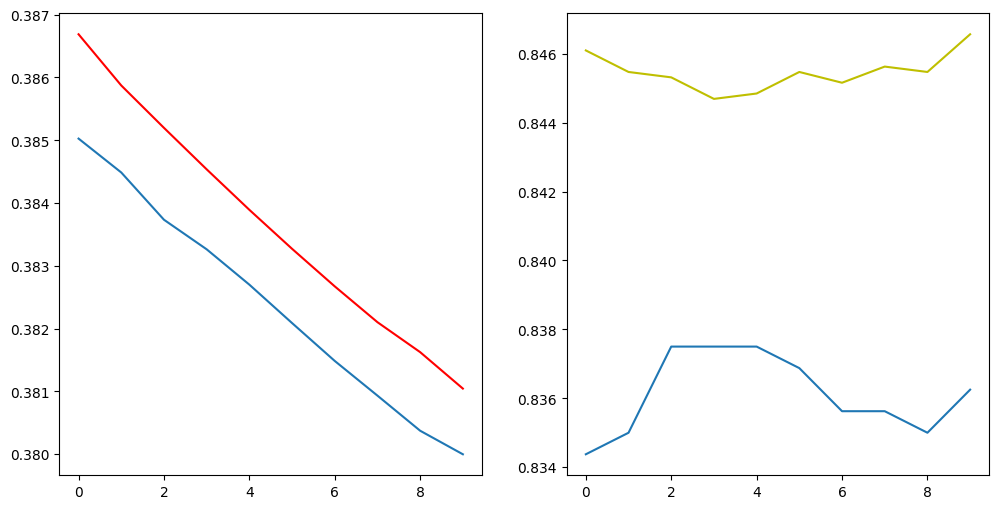

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],c='r')
plt.plot(hist.history['val_loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'],c='y')
plt.plot(hist.history['val_accuracy'])

In [ ]:
# to see weights
model.layers[0].get_weights()

[array([[-1.817432 ],
        [ 0.2979121],
        [ 0.2622261]], dtype=float32),
 array([-0.6110784], dtype=float32)]

In [47]:
prd = model.predict(x_test_scale)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [50]:
y_prd = np.where(prd>0.5,1,0)

In [ ]:
# from sklearn.metrics import accuracy_score
# acc = accuracy_score(y_test,y_prd)
# acc

0.7925

- this accuracy is low mean the model is less acccuarete i am doing some changes in the model to better the accuracy

In [71]:
# i am creating another model 
new_model = Sequential()
new_model.add(Dense(5,activation="relu",input_dim = 11)) # in this layer i use relu activation
new_model.add(Dense(3,activation="relu")) # in previous model there is one hidden layer here i use 2
new_model.add(Dense(1,activation="sigmoid")) # output layer use sigmoid for binary classification

d:\anaconda\envs\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
new_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96 (384.00 B)

 Trainable params: 96 (384.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
new_model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
new_model.fit(X_train_scale,y_train,epochs=30,validation_split=0.2) # val_split testing during trning

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7973 - loss: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.0000e+00
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7915 - loss: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.0000e+00
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7962 - loss: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.0000e+00
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7997 - loss: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.0000e+00
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7872 - loss: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.0000e+00
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7936 - loss: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.0000e+00
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7940 - loss: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.0000e+00
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/s

# the accuracy of both model is same 

In [82]:
new_model.layers[0].get_weights()

[array([[  9.578387 ,  -4.2369184,  -3.0129287,  11.452331 ,  10.449438 ],
        [-11.919414 , -13.054025 , -14.958521 , -15.24208  ,  -8.349449 ],
        [ -6.822408 ,   9.069345 ,  -4.629192 ,  -8.343907 ,   2.492616 ],
        [ 13.778847 , -10.622403 ,  12.878165 ,  -6.7574444, -13.65346  ],
        [-12.315433 ,   0.6576536, -12.482366 ,   7.20476  ,   8.924126 ],
        [  4.96624  ,  10.577214 ,  12.635443 ,   5.907972 ,   4.7470756],
        [  9.575125 ,   3.8413687,   2.175346 ,  -1.1419948,  12.214336 ],
        [  7.3818398,  -9.346617 ,   6.7406483,   7.2131596,   3.25317  ],
        [  9.819161 , -15.820915 ,   3.2965603,  -9.633569 , -15.585599 ],
        [-14.011084 ,  11.188593 ,  -4.370897 ,   9.248595 ,   9.244522 ],
        [  9.549642 ,   5.282012 ,   9.980622 ,  12.088657 ,  10.437124 ]],
       dtype=float32),
 array([15.772689, 15.909227, 16.114908, 16.215168, 15.97618 ],
       dtype=float32)]